# L01: Energy Data Analysis Correlations

## Pre-lab

Count number of high-income, mid-range, low-mid customers in `customers.csv`. Read battery capacity and calculate the average car battery capacity for respective income demographics. Show results on a bar graph. 

In [17]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
filename = "./warsaw/customers.csv"
high_ct, mid_ct, lowmid_ct = (0, 0, 0)
high_bc_sum, mid_bc_sum, lowmid_bc_sum = (0, 0, 0)

with open(filename, mode="r", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # skip header
    for row in reader:
        tier = row[1].strip()
        bat_cap = float(row[3].strip())
        if tier == "High":
            high_ct += 1
            high_bc_sum += bat_cap
        elif tier == "Mid-Range":
            mid_ct += 1
            mid_bc_sum += bat_cap
        elif tier == "Low-Mid":
            lowmid_ct += 1
            lowmid_bc_sum += bat_cap
        else:
            print(tier)  # anything i haven't accounted for?

print("customers")
print("high income customers: ", high_ct)
print("high battery capacity avg (kwh): ", high_bc_sum/high_ct)
print("low-mid income: ", lowmid_ct)
print("low-mid battery capacity avg (kwh): ", lowmid_bc_sum/lowmid_ct)
print("mid income: ", mid_ct)
print("mid battery capacity avg (kwh): ", mid_bc_sum/mid_ct)

customers
high income customers:  1190
high battery capacity avg (kwh):  85.65613445378101
low-mid income:  3990
low-mid battery capacity avg (kwh):  45.143558897242826
mid income:  2820
mid battery capacity avg (kwh):  70.76134751772918


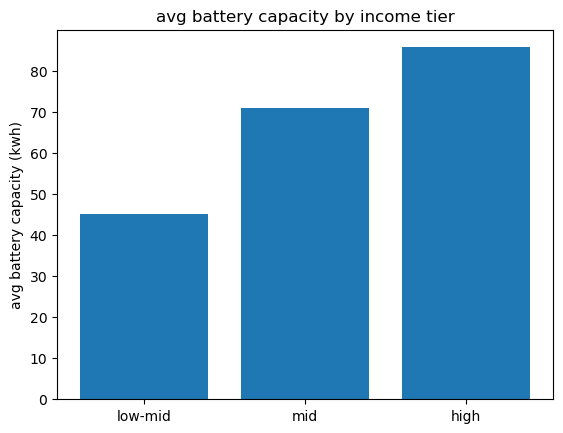

In [4]:
# graph
cats = ["low-mid", "mid", "high"]
avgs = [lowmid_bc_sum/lowmid_ct, mid_bc_sum/mid_ct, high_bc_sum/high_ct]

# plot
fig, ax = plt.subplots()

ax.bar(cats, avgs)

ax.set_ylabel('avg battery capacity (kwh)')
ax.set_title('avg battery capacity by income tier')

plt.show()

## Lab

Calculate correlation coefficienr, r, between quantitative variables.

In [5]:
# test data for r function

x_ = [54.5,59.5,63.5,67.5,72.0,78.5,83.0]
y_ = [81,97,103,123,150,182,195]

def compute_r(x, y):
    n = len(x)
    sum = 0
    for i in range(n):
        sum += (x[i] - np.mean(x)) / np.std(x) * ((y[i] - np.mean(y)) / np.std(y))
    return 1 / (n) * sum # 1/n instead of 1/(n-1) for some reason

print(compute_r(x_,y_))

0.9906248824255884


Using `generation.csv`, calculate correlation coefficients for DtSN vs PG and RH vs PG. Graph scatter plots of both respective sets.

In [6]:
with open("./forecast/generation.csv", 'r') as f:
    data = list(csv.reader(f, delimiter=","))

data = np.array(data)

In [18]:
# Calculates the r between Distance to Solar Noon (col 6) and 
# Power Generation as well as Relative Humidity and Power Generation 

dtsn, temp, pg, rh = [], [], [], []

data = data[1:] # delete header 
for i in range(len(data)): 
    dtsn.append(float(data[i][6])) 
    temp.append(float(data[i][7])) 
    pg.append(float(data[i][15])) 
    rh.append(float(data[i][12]))

# clean up data
# for i in range(len(pg) - 1, -1, -1):  # iterate backwards
#     if pg[i] == 0: 
#         dtsn.pop(i)
#         pg.pop(i)
#         rh.pop(i)
#         temp.pop(i)
                
print("dtsn r = ", compute_r(dtsn, pg))
print("rhumidity r = ", compute_r(rh, pg))

# before
# dtsn r =  -0.7466669504871705
# rhumidity r =  -0.5225753489648308

# after cu
# dtsn r =  -0.7793238516909664
# rhumidity r =  -0.5306096503812445


dtsn r =  -0.7463364179014278
rhumidity r =  -0.5207126608008991


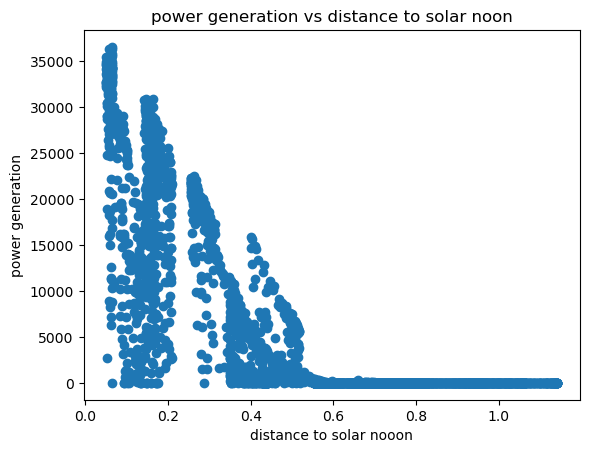

r =  -0.7463364179014278


In [19]:
# scatter plot of pg vs dtsn
fig, ax = plt.subplots()
ax.scatter(dtsn, pg)

ax.set_xlabel('distance to solar nooon')
ax.set_ylabel('power generation')
ax.set_title('power generation vs distance to solar noon')

plt.show()
print("r = ", compute_r(dtsn, pg))

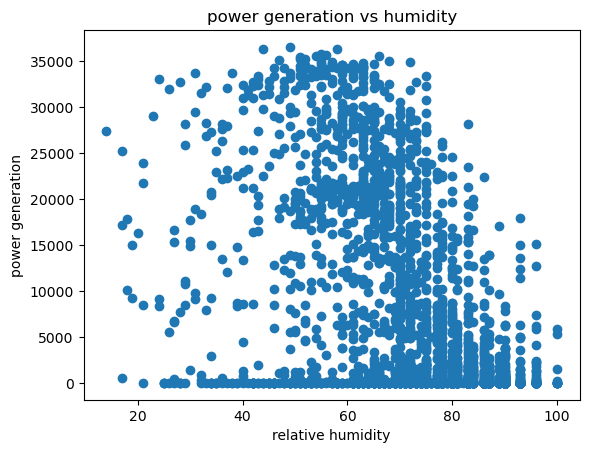

r =  -0.5207126608008991


In [20]:
# scatter plot of pg vs rh
fig, ax = plt.subplots()

ax.scatter(rh, pg)

ax.set_xlabel('relative humidity')
ax.set_ylabel('power generation')
ax.set_title('power generation vs humidity')

plt.show()
print("r = ", compute_r(rh, pg))


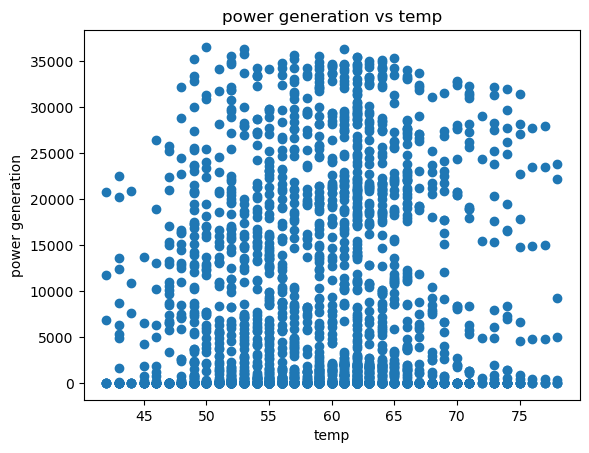

r =  -0.5207126608008991


In [21]:
# pg vs temp
fig, ax = plt.subplots()

ax.scatter(temp, pg)

ax.set_xlabel('temp')
ax.set_ylabel('power generation')
ax.set_title('power generation vs temp')

plt.show()
print("r = ", compute_r(rh, pg))


## Discussion

Before data cleanup (removing rows where power generation is zero), the r-values for distance to solar noon and relative humidity vs power generation were -.747 and -.523 respectively. After data cleanup, the new r-values, -.780 and -.531 are closer to -1 which indcates a slightly stronger correlation between the two variables. Visually, the scatter plots show fewer outlying points, making the linear trend clearer.

### Summary
- EV charging: higher income demographics tend to have vehicles with higher battery capcity.
- Solar power: relative humidity and temperature do not affect power generation. However, distance to solar noon does have a moderate affect generation. As distance increases, power generation decreases.
- Programming: it is easier to use Pandas DataFrames to read CSV data instead of parsing with Python's built in CSV reader.